<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>1.0 Importing the Data</b>

Load the csv:

In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [11]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [116]:
df_g_cont=df.groupby(["continent"], as_index=False)
df_g_cont_sum=df_g_cont[["wine_servings"]].sum()
df_g_cont_sum

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [157]:
df_beer=df[["country", "beer_servings", "continent"]]
df_beer_g_cont=df_beer.groupby(["continent"])
df_beer_stat=df_beer_g_cont.describe()
df_beer_stat=df_beer_stat.dropna(axis=1)
#df_beer_stat=df_beer_stat.assign(sum=df_beer_g_cont.sum())
df_beer_stat

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

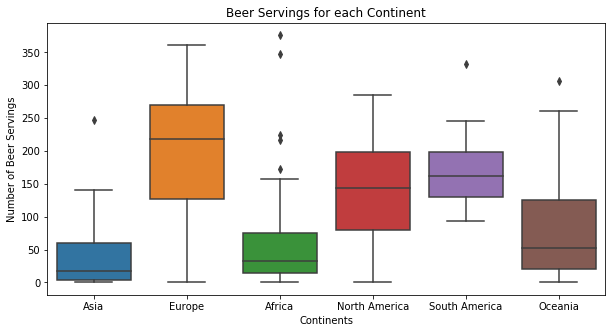

In [160]:
import seaborn as sns
plt.figure(figsize=(10,5))
beer_box=sns.boxplot(x="continent", y="beer_servings", data=df_beer)
beer_box.set(xlabel="Continents",ylabel="Number of Beer Servings")
plt.title("Beer Servings for each Continent")
plt.show(beer_box)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

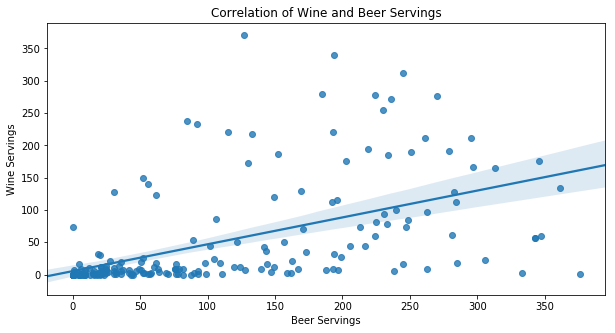

In [162]:
plt.figure(figsize=(10,5))
wine_beer=sns.regplot(x="beer_servings", y="wine_servings", data=df)
wine_beer.set(xlabel="Beer Servings",ylabel="Wine Servings")
plt.title("Correlation of Wine and Beer Servings")
plt.show(wine_beer)

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


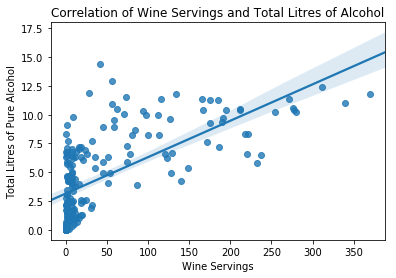

The R^2 value of this Linear Model is:  0.4456875459787605


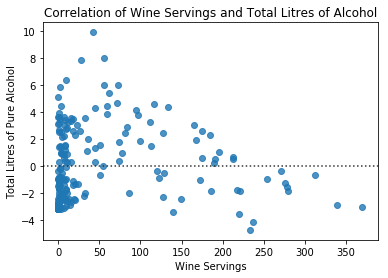

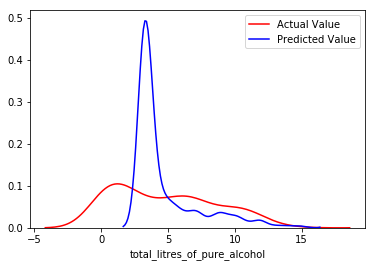

In [191]:
from sklearn.linear_model import LinearRegression
#Plot x and y
wine_total=sns.regplot(x="wine_servings", y="total_litres_of_pure_alcohol", data=df)
wine_total.set(xlabel="Wine Servings",ylabel="Total Litres of Pure Alcohol")
plt.title("Correlation of Wine Servings and Total Litres of Alcohol")
plt.show(wine_total)

#Linear Regression
lre=LinearRegression()
X=df[["wine_servings"]]
Y=df["total_litres_of_pure_alcohol"]
lre.fit(X,Y)
Yhat=lre.predict(X)
a0=lre.intercept_
a1=lre.coef_

#R^2
print("The R^2 value of this Linear Model is: ",lre.score(X, Y))

#Residuals
wine_total_resid=sns.residplot(df["wine_servings"], df["total_litres_of_pure_alcohol"])
wine_total_resid.set(xlabel="Wine Servings",ylabel="Total Litres of Pure Alcohol")
plt.title("Correlation of Wine Servings and Total Litres of Alcohol")
plt.show(wine_total_resid)

#Distribution Plot
ax1=sns.distplot(df["total_litres_of_pure_alcohol"], hist=False, color="r", label="Actual Value")
wine_total_dist=sns.distplot(Yhat,hist=False, color="b", label="Predicted Value", ax=ax1)
plt.show(wine_total_dist)

### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

number of test samples : 58
number of training samples: 135
R^2 for training data: 0.46804539436266457
R^2 for test data: 0.3705112087312815


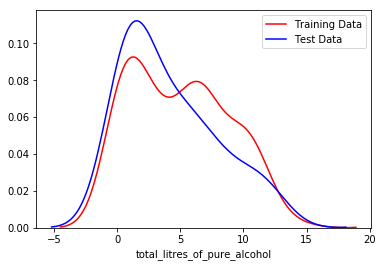

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3,random_state=0)
lre2=LinearRegression()
lre2.fit(x_train,y_train)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("R^2 for training data:", lre2.score(x_train,y_train))
print("R^2 for test data:",lre2.score(x_test,y_test))

#Distribution Plot
ax1=sns.distplot(y_train, hist=False, color="r", label="Training Data")
train_test=sns.distplot(y_test,hist=False, color="b", label="Test Data", ax=ax1)
plt.show(train_test)

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all

R^2 for training data: 0.5284414533252554
R^2 for test data: 0.46557069494966197


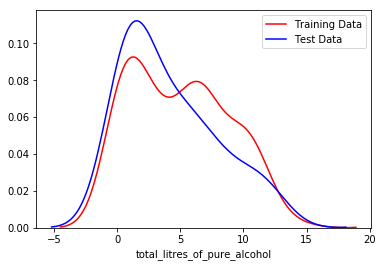

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
Input=[('scale',StandardScaler()),("polynomial",PolynomialFeatures(include_bias=False)),("model",LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)
print("R^2 for training data:", pipe.score(x_train,y_train))
print("R^2 for test data:",pipe.score(x_test,y_test))

#Scatter Plot
ax1=sns.distplot(y_train, hist=False, color="r", label="Training Data")
train_test_piped=sns.distplot(y_test,hist=False, color="b", label="Test Data", ax=ax1)
plt.show(train_test_piped)

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [220]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
print("R^2 for training data:", RidgeModel.score(x_train,y_train))
print("R^2 for test data:",RidgeModel.score(x_test,y_test))

R^2 for training data: 0.46804539436265924
R^2 for test data: 0.37051120197596066
R^2 for test data (simple linear): 0.3705112087312815


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [224]:
from sklearn.preprocessing import PolynomialFeatures
poly2=PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.fit_transform(x_test)

RidgeModel2=Ridge(alpha=0.1)
RidgeModel2.fit(x_train_poly2, y_train)
print("R^2 for training data:", RidgeModel2.score(x_train_poly2,y_train))
print("R^2 for test data:",RidgeModel2.score(x_test_poly2,y_test))

R^2 for training data: 0.5284414533250039
R^2 for test data: 0.46557067058998486


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.